In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"/content/recommendation_data.csv")
data.head()

,customer_id,Recommendation_name,Recommendation_date,suggestion_type,purchase_flag
0,1.0,Recommend_screenguard,7/2/2021,With phone,0.0
1,2.0,Recommend_screenguard,7/3/2021,With phone,0.0
2,3.0,Recommend_screenguard,7/4/2021,With cover,1.0
3,4.0,Recommend_screenguard,7/5/2021,With phone,0.0
4,5.0,Recommend_screenguard,7/6/2021,With cover,1.0


In [3]:
data.describe()

,customer_id,purchase_flag
count,711.000000,711.000000
mean,433.136428,0.347398
std,253.236820,0.476479
min,1.000000,0.000000
25%,215.000000,0.000000
50%,426.000000,0.000000
75%,649.500000,1.000000
max,868.000000,1.000000


In [6]:
data.shape

(868, 5)

In [7]:
data.isnull().sum()

,0
customer_id,157
Recommendation_name,157
Recommendation_date,157
suggestion_type,157
purchase_flag,157


In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(711, 5)

In [12]:
from datetime import datetime

data['Recommendation_date'] = pd.to_datetime(data['Recommendation_date'], utc=True, format='mixed')

data['year'] = data['Recommendation_date'].dt.year
data['month'] = data['Recommendation_date'].dt.month
data['day'] = data['Recommendation_date'].dt.day

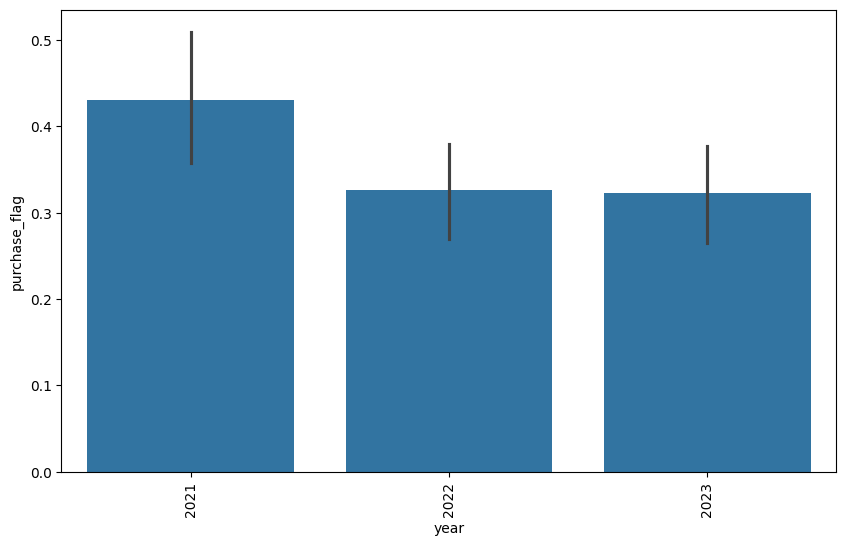

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="purchase_flag", data=data)
plt.xticks(rotation=90)

plt.show()


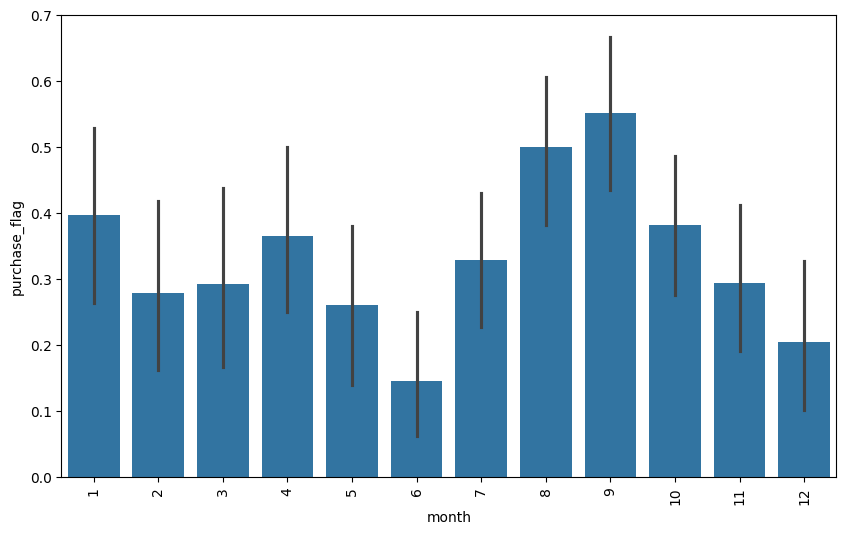

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="month", y="purchase_flag", data=data)
plt.xticks(rotation=90)

plt.show()


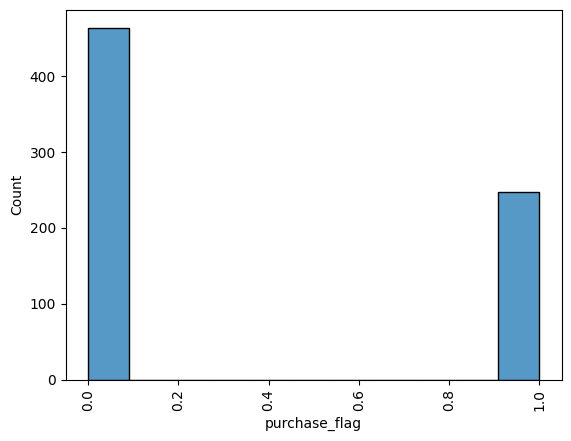

In [14]:
sns.histplot(x="purchase_flag", data=data)
plt.xticks(rotation=90)

plt.show()


In [15]:
data.drop(["customer_id","Recommendation_date"],axis=1,inplace=True)

In [17]:
data.columns

Index(['Recommendation_name', 'suggestion_type', 'purchase_flag', 'year',
       'month', 'day'],
      dtype='object')

In [19]:
data.groupby("suggestion_type")["purchase_flag"].value_counts()

suggestion_type  purchase_flag
With cover       0.0              206
                 1.0              130
With phone       0.0              258
                 1.0              117
Name: count, dtype: int64

In [20]:
ct_values=pd.crosstab(data["suggestion_type"],data["purchase_flag"]).values
ct_values

array([[206, 130],
       [258, 117]])

In [21]:
with_phone_rate=117/(117+258)
with_phone_cover=130/(130+206)

In [22]:
print(with_phone_rate)
print(with_phone_cover)

0.312
0.3869047619047619


In [23]:
null_hypothesis="There is no relaship between purchase rate and recommendation type.they are independed"
alt_hypothesis="There is a relaship between purchase rate and recommendation type.they are not independed"

In [24]:
from scipy.stats import chi2_contingency
chi2_statistic,p_value,dof,expected_values=chi2_contingency(ct_values,correction=False)
print(chi2_statistic,p_value)

4.385751976925068 0.03624050241176425


In [25]:
prob=0.95
alpha=1-prob
print('significance=%.3f, p=%.3f'%(alpha,p_value))
if p_value<=alpha:
  print("Dependend,we can reject null hypothesis")
else:
  print("Independent,no sufficient evidence to reject null hypothesis")

significance=0.050, p=0.036
Dependend,we can reject null hypothesis


In [ ]:
"There is a relaship between purchase rate and recommendation type.they are not independed"
"With cover has a higher purchase rate than With phone"